In [18]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('eigenvalue.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [16]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset= scaler.fit_transform(df)

In [17]:
dataset

array([[5.40080705e-01, 4.50897231e-01, 1.74648344e-01, ...,
        5.66826397e-01, 5.81054688e-01, 2.84252416e-04],
       [5.42494970e-01, 4.56120388e-01, 1.86478497e-01, ...,
        5.54604253e-01, 5.83170573e-01, 2.84252416e-04],
       [5.43088427e-01, 4.55279742e-01, 1.95388417e-01, ...,
        5.51070242e-01, 5.85449219e-01, 0.00000000e+00],
       ...,
       [4.18529306e-04, 2.99404214e-04, 4.62167640e-02, ...,
        9.81510321e-01, 8.12174479e-01, 9.99431495e-01],
       [8.44603034e-04, 9.06845333e-04, 3.86052973e-02, ...,
        9.83553738e-01, 8.15592448e-01, 9.98862990e-01],
       [1.68804918e-03, 1.51086569e-03, 3.38267447e-02, ...,
        9.83674036e-01, 8.19010417e-01, 9.98010233e-01]])

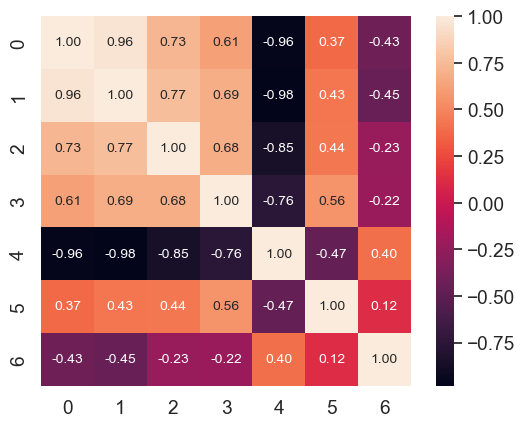

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [19]:
#相关矩阵热力图显示
cm = np.corrcoef(df.values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()
plt.figure()


In [30]:
k = 5
iteration = 3
data = df.iloc[:,0:5]
data_zs = 1.0*(data - data.mean())/data.std() #数据标准化，std()表示求总体样本方差(除以n-1),numpy中std()是除以n
print(data_zs)

from sklearn.cluster import KMeans
model = KMeans(n_clusters = k, max_iter = iteration) #分为k类
#model = KMeans(n_clusters = k, n_jobs = 4, max_iter = iteration) #分为k类，并发数4
model.fit(data_zs) #开始聚类

#简单打印结果
r1 = pd.Series(model.labels_).value_counts() #统计各个类别的数目
r2 = pd.DataFrame(model.cluster_centers_) #找出聚类中心
r = pd.concat([r2, r1], axis = 1) #横向连接（0是纵向），得到聚类中心对应的类别下的数目
print(r)
r.columns = list(data.columns) + [u'类别数目'] #重命名表头
print('-------------')
print(r)

#详细输出原始数据及其类别
r = pd.concat([data, pd.Series(model.labels_, index = data.index)], axis = 1)  #详细输出每个样本对应的类别
r.columns = list(data.columns) + [u'聚类类别'] #重命名表头
r.to_csv('temp.csv') #保存结果


       PM2.5(微克每立方米)   PM10(微克每立方米)   SO2(微克每立方米)   NO2(微克每立方米)   CO(毫克每立方米)
0           1.034667       0.887208      0.607361      0.131159    -0.850725
1           1.044574       0.911381      0.717883      0.299143    -0.908994
2           1.047009       0.907491      0.801124      0.309549    -0.925842
3           1.144994       1.000766      0.841535      0.252041    -0.997163
4           0.999967       0.800072      0.426996     -0.124314    -0.732262
...              ...            ...           ...           ...          ...
42244      -1.164137      -1.184155     -0.889448     -0.849520     1.172250
42245      -1.181555      -1.199632     -0.607161     -0.871019     1.132577
42246      -1.179837      -1.198247     -0.592501     -0.854525     1.126275
42247      -1.178089      -1.195435     -0.663611     -0.837733     1.136017
42248      -1.174628      -1.192640     -0.708254     -0.796186     1.136590

[42249 rows x 5 columns]
          0         1         2         3         

c:\Users\16217\.conda\envs\visual\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


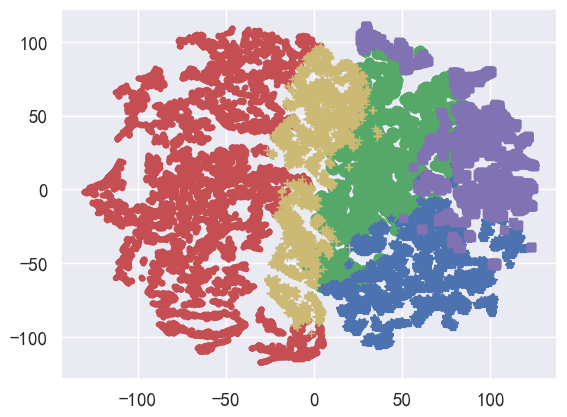

In [31]:
#用TSNE进行数据降维并展示聚类结果
from sklearn.manifold import TSNE
tsne = TSNE()
tsne.fit_transform(data_zs) #进行数据降维,并返回结果
tsne = pd.DataFrame(tsne.embedding_, index = data_zs.index) #转换数据格式

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

#不同类别用不同颜色和样式绘图
d = tsne[r[u'聚类类别'] == 0]     # 找出聚类类别为0的数据对应的降维结果
plt.plot(d[0], d[1], 'r.')
d = tsne[r[u'聚类类别'] == 1]
plt.plot(d[0], d[1], 'go')
d = tsne[r[u'聚类类别'] == 2]
plt.plot(d[0], d[1], 'b*')
d = tsne[r[u'聚类类别'] == 3]
plt.plot(d[0], d[1], 'y+')
d = tsne[r[u'聚类类别'] == 4]
plt.plot(d[0], d[1], 'ms')
plt.show()

plt.show()

In [24]:
tsne

,0,1
0,90.433022,-76.171745
1,90.491272,-75.693451
2,90.520950,-75.553619
3,90.691734,-75.460098
4,90.318329,-76.582939
...,...,...
42244,-28.440575,131.738708
42245,-32.652424,128.822067
42246,-32.645420,128.798706
42247,-32.557270,128.808350
